In [10]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
dataset = randn(25)

(0, 1)

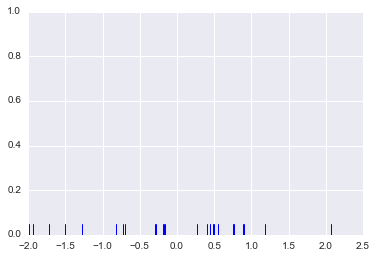

In [12]:
sns.rugplot(dataset)
plt.ylim(0,1)

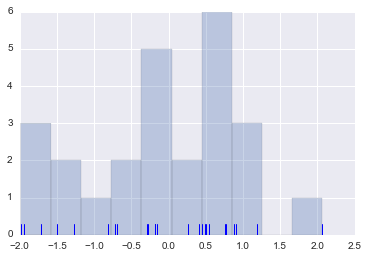

In [13]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

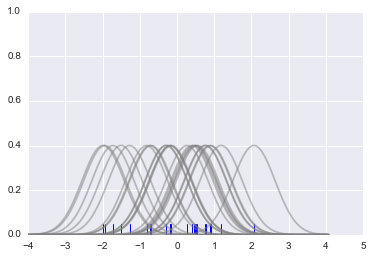

In [15]:
sns.rugplot(dataset)

x_min = dataset.min() -2
x_max = dataset.max() +2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) ) ** 0.2

kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

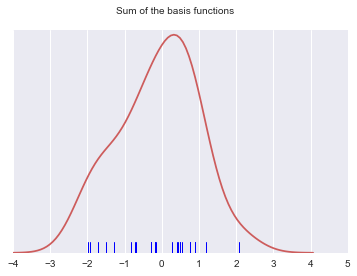

In [16]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the basis functions')

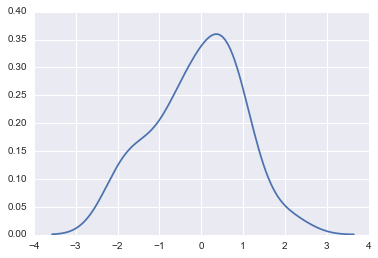

In [17]:
sns.kdeplot(dataset)

In [18]:
dataset

array([ 0.5493626 ,  0.76859195, -1.98743728,  0.88463134,  2.06805627,
       -0.18521837, -0.15792918, -0.72544773,  0.26646697, -1.94172087,
       -0.2940234 ,  1.18461337, -1.50365198,  0.75532706, -0.81950105,
        0.50387176,  0.48896678, -1.72205112, -1.27624097,  0.44695055,
        0.9069611 ,  0.40244792, -0.1785656 , -0.69889003, -0.28350619])

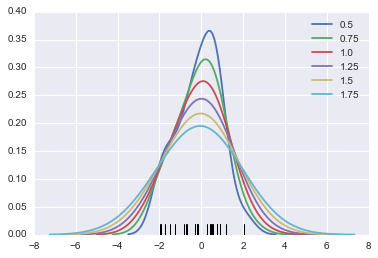

In [19]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

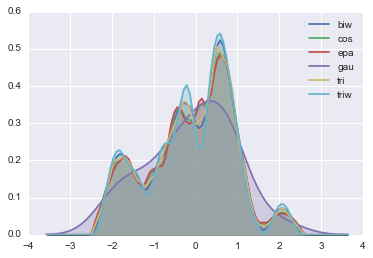

In [21]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

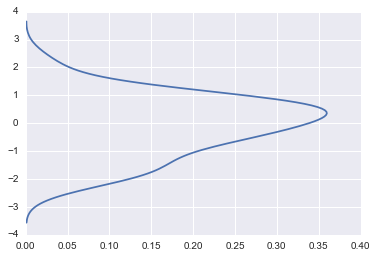

In [22]:
sns.kdeplot(dataset,vertical=True)

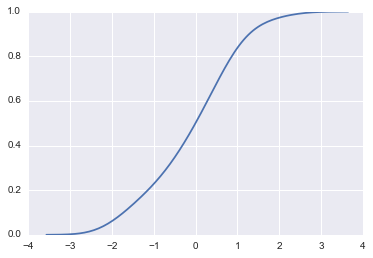

In [23]:
sns.kdeplot(dataset,cumulative=True)

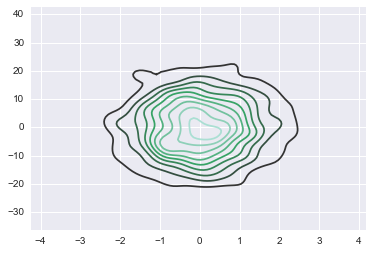

In [24]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

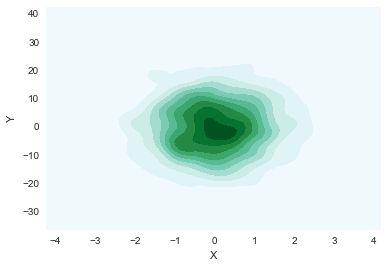

In [26]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

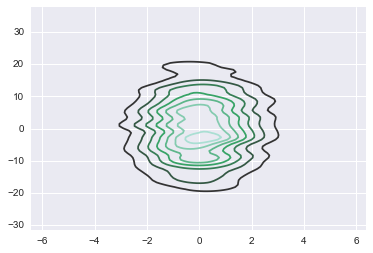

In [27]:
sns.kdeplot(dframe,bw=1)

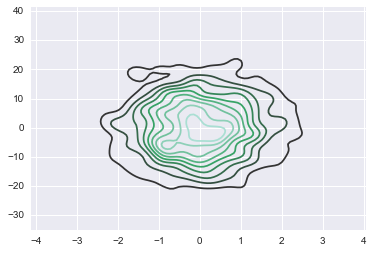

In [28]:
sns.kdeplot(dframe,bw='silverman')

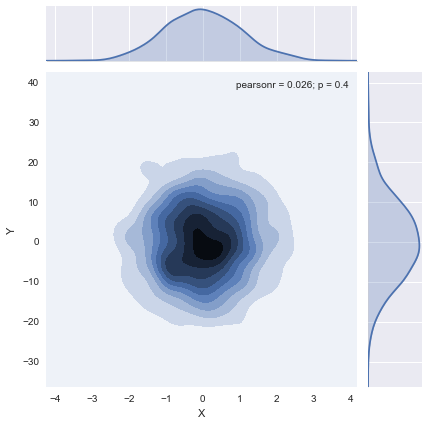

In [29]:
sns.jointplot('X','Y',dframe,kind='kde')